In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
df=pd.read_pickle('/Users/user/Documents/Instacart Basket Analysis/02 Data/Prepared Data/final_part_2.pkl') 

In [5]:
print(df)

          product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                907        Premium Sliced Bacon       106             12   
3                907        Premium Sliced Bacon       106             12   
4               1000                    Apricots        18             10   
...              ...                         ...       ...            ...   
32404854       49235         Organic Half & Half        53             16   
32404855       49520      Orange Sparkling Water       115              7   
32404856       49520      Orange Sparkling Water       115              7   
32404857       49520      Orange Sparkling Water       115              7   
32404858       49520      Orange Sparkling Water       115              7   

          prices  order_id  user_id  order_number  orders_days_of_week  \
0

# Top 10 popular departments by region in %

In [6]:
# Group by 'region' and 'department', then count the number of orders in each group
department_counts = df.groupby(['region', 'department']).size().reset_index(name='order_count')

# Calculate the total number of orders in each region
total_orders_by_region = department_counts.groupby('region')['order_count'].sum().reset_index(name='total_orders')

# Merge the total orders back into the department counts DataFrame
department_counts = department_counts.merge(total_orders_by_region, on='region')

# Calculate the percentage of total orders for each department in each region
department_counts['percentage'] = (department_counts['order_count'] / department_counts['total_orders']) * 100

# Sort the results by region and percentage in descending order
department_counts = department_counts.sort_values(['region', 'percentage'], ascending=[True, False])

# 10 departments by % for each region
top_departments_by_region = department_counts.groupby('region').head(10)

# Pivot the data 
top_departments_pivot = top_departments_by_region.pivot(index='department', columns='region', values='percentage')

print(top_departments_pivot)



region             Midwest  Northeast      South       West
department                                                 
bakery            3.604808   3.645092   3.602846   3.631354
beverages         8.234135   8.447323   8.329777   8.202076
canned goods      3.299872   3.263387   3.298914   3.311092
dairy eggs       16.640370  16.670802  16.651113  16.683269
deli              3.233743   3.264470   3.237794   3.247773
dry goods pasta   2.682115   2.652857   2.663520   2.696254
frozen            6.898428   6.830963   6.930207   6.895394
pantry            5.819167   5.756774   5.767630   5.804800
produce          29.325282  29.109136  29.286367  29.241402
snacks            8.867792   8.993513   8.870980   8.945156


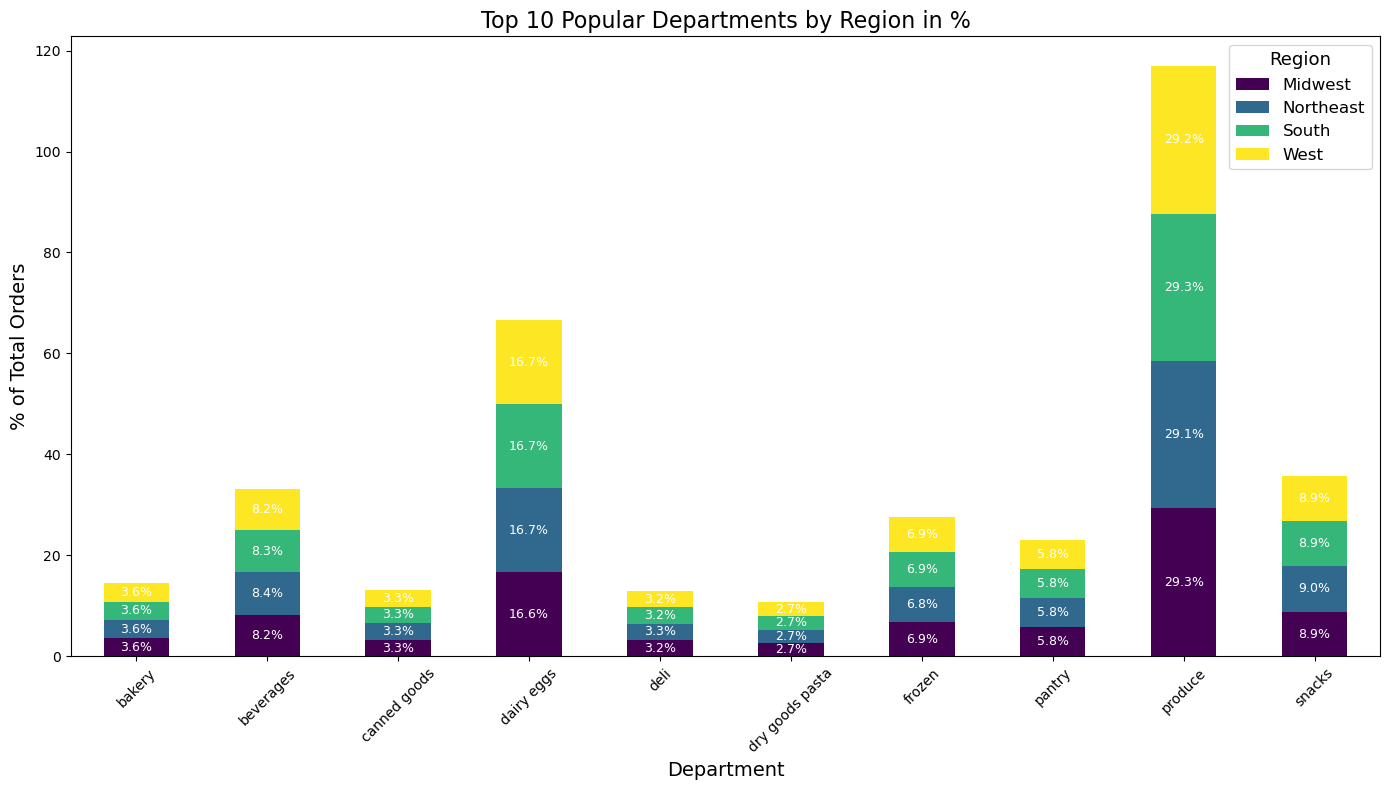

In [10]:
# Plotting 
ax = top_departments_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Set the title and labels
plt.title('Top 10 Popular Departments by Region in %', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('% of Total Orders', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Region', title_fontsize='13', fontsize='12')

# Add percentage labels
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=9, color='white')

# Show the plot
plt.tight_layout()
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/popular_departments_by_region.png')
plt.show()

# Analyze purchasing habits within these segments: age, income, family status and number of dependants.

# 1. Grouping and Aggregation:

In [12]:
#AGE:
# Group by age_group and calculate the average order value and order frequency
age_analysis = df.groupby('age_group', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

# Normalize the order frequency by the number of unique users in each age group
age_analysis['order_frequency_per_user'] = age_analysis['order_frequency'] / df.groupby('age_group', observed=True)['user_id'].nunique()


In [16]:
#INCOME 
# Define income brackets
income_brackets = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
income_labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

# Create a new column for income bracket
df['income_bracket'] = pd.cut(df['income'], bins=income_brackets, labels=income_labels)

# Group by income_bracket and calculate the average order value and order frequency
income_analysis = df.groupby('income_bracket', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

income_analysis['order_frequency_per_user'] = income_analysis['order_frequency'] / df.groupby('income_bracket', observed=True)['user_id'].nunique()

In [17]:
#DEPENDANTS 
# Group by n_dependants and calculate the average order value and order frequency
dependants_analysis = df.groupby('n_dependants', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

# Normalize the order frequency by the number of unique users in each number of dependants
dependants_analysis['order_frequency_per_user'] = dependants_analysis['order_frequency'] / df.groupby('n_dependants', observed=True)['user_id'].nunique()


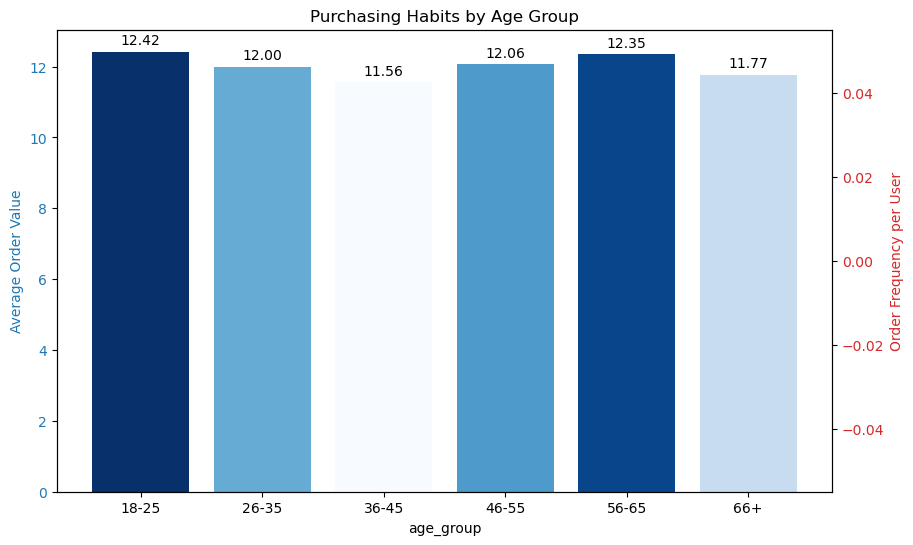

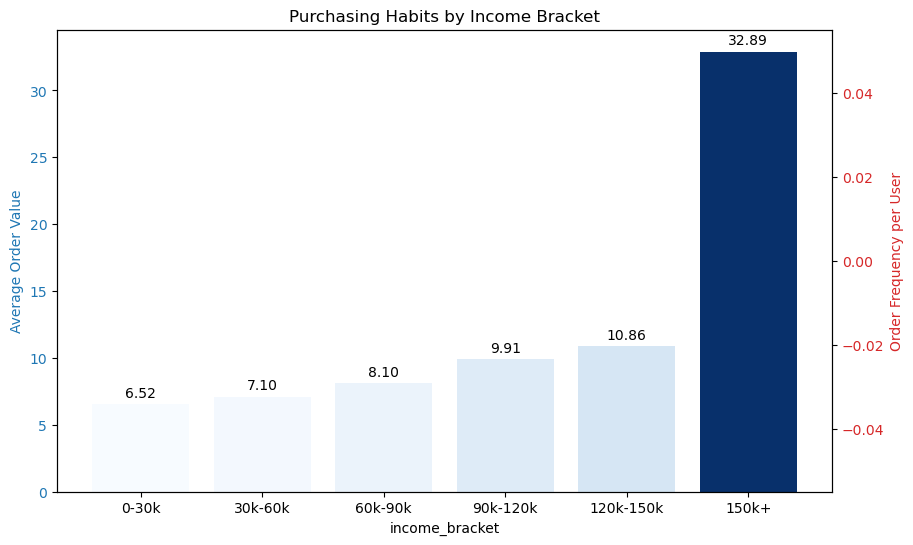

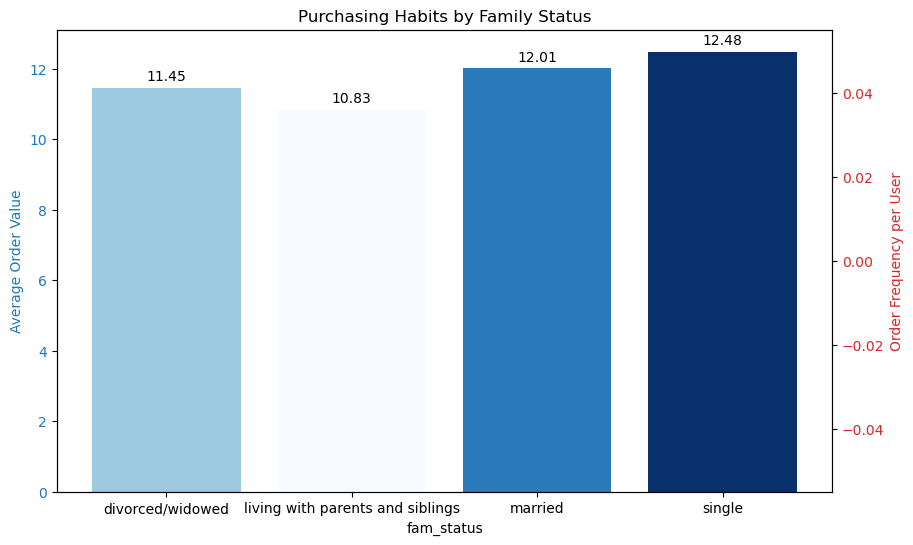

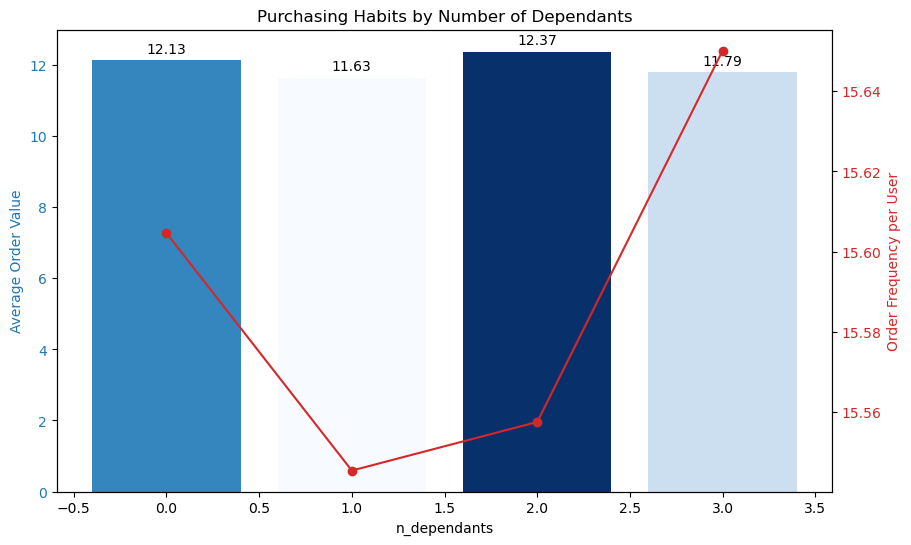

In [24]:
#AGE:
# Group by age_group and calculate the average order value and order frequency
age_analysis = df.groupby('age_group', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

# Normalize the order frequency by the number of unique users in each age group
age_analysis['order_frequency_per_user'] = age_analysis['order_frequency'] / df.groupby('age_group', observed=True)['user_id'].nunique()


#INCOME 
# Define income brackets
income_brackets = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
income_labels = ['0-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']

# Create a new column for income bracket
df['income_bracket'] = pd.cut(df['income'], bins=income_brackets, labels=income_labels)

# Group by income_bracket and calculate the average order value and order frequency
income_analysis = df.groupby('income_bracket', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

income_analysis['order_frequency_per_user'] = income_analysis['order_frequency'] / df.groupby('income_bracket', observed=True)['user_id'].nunique()



#DEPENDANTS 
# Group by n_dependants and calculate the average order value and order frequency
dependants_analysis = df.groupby('n_dependants', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

# Normalize the order frequency by the number of unique users in each number of dependants
dependants_analysis['order_frequency_per_user'] = dependants_analysis['order_frequency'] / df.groupby('n_dependants', observed=True)['user_id'].nunique()


# Group by fam_status and calculate the average order value and order frequency
family_status_analysis = df.groupby('fam_status', observed=True).agg(
    average_order_value=pd.NamedAgg(column='prices', aggfunc='mean'),
    order_frequency=pd.NamedAgg(column='order_id', aggfunc=pd.Series.nunique)
).reset_index()

# Normalize the order frequency by the number of unique users in each family status
family_status_analysis['order_frequency_per_user'] = family_status_analysis['order_frequency'] / df.groupby('fam_status', observed=True)['user_id'].nunique()



#plotting 
import matplotlib.colors as mcolors

def plot_analysis(df, title, x_label):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Create a color map based on the values of average order value
    norm = mcolors.Normalize(vmin=df['average_order_value'].min(), vmax=df['average_order_value'].max())
    cmap = plt.get_cmap('Blues')
    bar_colors = [cmap(norm(value)) for value in df['average_order_value']]

    # Plot average order value with color shading
    bars = ax1.bar(df[x_label], df['average_order_value'], color=bar_colors)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('Average Order Value', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Add labels to the bars
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')

    # Plot order frequency per user
    ax2 = ax1.twinx()
    ax2.plot(df[x_label], df['order_frequency_per_user'], color='tab:red', marker='o')
    ax2.set_ylabel('Order Frequency per User', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)

# Plot analysis for each segment
plot_analysis(age_analysis, 'Purchasing Habits by Age Group', 'age_group')
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/purchasing_habits.png')

plot_analysis(income_analysis, 'Purchasing Habits by Income Bracket', 'income_bracket')
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/purchasing_habits_income.png')

plot_analysis(family_status_analysis, 'Purchasing Habits by Family Status', 'fam_status')
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/habits_by_family.png')

plot_analysis(dependants_analysis, 'Purchasing Habits by Number of Dependants', 'n_dependants')
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/habits_by_dependants.png')

plt.show()


# Examine customer distribution and behavior across different states.

In [25]:
#Customer Distribution by State

customer_distribution = df.groupby('state')['user_id'].nunique().reset_index().rename(columns={'user_id': 'Number of Customers'})
customer_distribution.sort_values('Number of Customers', ascending=False, inplace=True)

print(customer_distribution)

                   state  Number of Customers
0                Alabama                 4044
8   District of Columbia                 4044
15                  Iowa                 4044
14               Indiana                 4044
13              Illinois                 4044
12                 Idaho                 4044
10               Georgia                 4044
9                Florida                 4044
11                Hawaii                 4044
7               Delaware                 4044
6            Connecticut                 4044
5               Colorado                 4044
4             California                 4044
3               Arkansas                 4044
2                Arizona                 4044
1                 Alaska                 4044
41          South Dakota                 4043
35                  Ohio                 4043
36              Oklahoma                 4043
37                Oregon                 4043
38          Pennsylvania          

In [26]:
#Average Order Size by State
average_order_size = df.groupby('state').agg({'order_id': 'nunique', 'product_id': 'count'}).reset_index()
average_order_size['Average Order Size'] = average_order_size['product_id'] / average_order_size['order_id']
average_order_size = average_order_size[['state', 'Average Order Size']]

print(average_order_size)

                   state  Average Order Size
0                Alabama            9.873915
1                 Alaska           10.190374
2                Arizona           10.277120
3               Arkansas           10.159124
4             California           10.219371
5               Colorado            9.978615
6            Connecticut            9.907323
7               Delaware           10.069774
8   District of Columbia            9.806411
9                Florida            9.888340
10               Georgia           10.178309
11                Hawaii           10.064099
12                 Idaho           10.083526
13              Illinois           10.199043
14               Indiana           10.045513
15                  Iowa           10.082255
16                Kansas           10.038388
17              Kentucky           10.100770
18             Louisiana           10.228844
19                 Maine            9.996603
20              Maryland           10.028313
21        

In [27]:
#Order Frequency by State
order_frequency = df.groupby(['state', 'user_id']).agg({'order_id': 'nunique'}).reset_index().groupby('state')['order_id'].mean().reset_index().rename(columns={'order_id': 'Average Orders per Customer'})
print(order_frequency)

                   state  Average Orders per Customer
0                Alabama                    15.977992
1                 Alaska                    15.736400
2                Arizona                    15.735163
3               Arkansas                    15.484174
4             California                    15.964886
5               Colorado                    15.841988
6            Connecticut                    15.550198
7               Delaware                    15.643175
8   District of Columbia                    15.475025
9                Florida                    15.730218
10               Georgia                    15.946835
11                Hawaii                    15.550692
12                 Idaho                    14.888477
13              Illinois                    15.347923
14               Indiana                    15.441147
15                  Iowa                    15.340999
16                Kansas                    15.708632
17              Kentucky    

In [28]:
#Preferred Product Categories by State

top_categories = df.groupby(['state', 'department'])['product_id'].count().reset_index()
top_categories = top_categories.sort_values(['state', 'product_id'], ascending=[True, False]).groupby('state').head(1).rename(columns={'department': 'Top Department', 'product_id': 'Total Products'})
print(top_categories)

                     state Top Department  Total Products
19                 Alabama        produce          189111
40                  Alaska        produce          191180
61                 Arizona        produce          190712
82                Arkansas        produce          184043
103             California        produce          193991
124               Colorado        produce          188254
145            Connecticut        produce          181607
166               Delaware        produce          185503
187   District of Columbia        produce          175545
208                Florida        produce          183151
229                Georgia        produce          194784
250                 Hawaii        produce          185696
271                  Idaho        produce          175501
292               Illinois        produce          186061
313                Indiana        produce          183557
334                   Iowa        produce          181421
355           

# Order frequency by time of day in order to better understand customer shopping habits¶

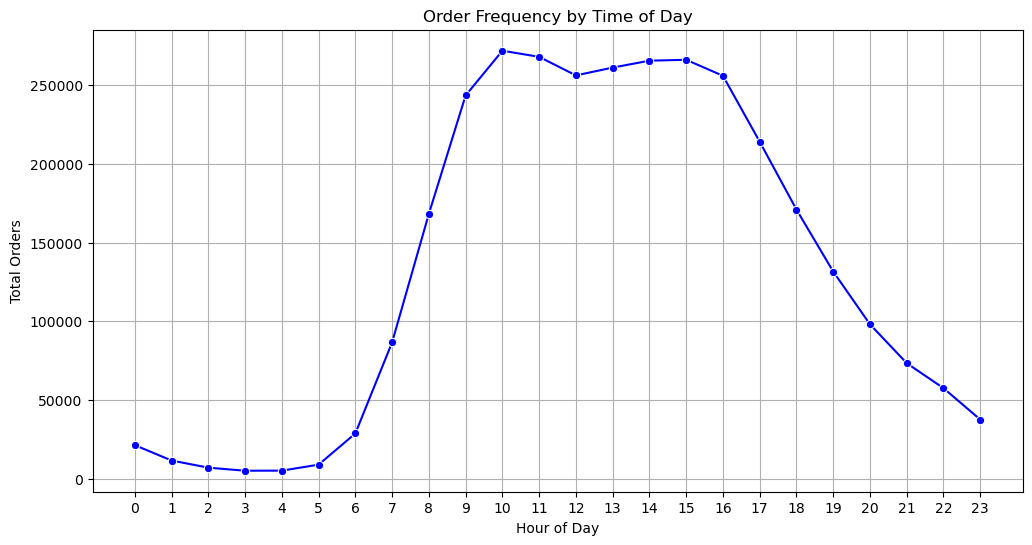

In [29]:
order_frequency_by_hour = df.groupby('order_hour_of_day').agg({'order_id': 'nunique'}).reset_index().rename(columns={'order_id': 'Total Orders'})


plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour_of_day', y='Total Orders', data=order_frequency_by_hour, marker='o', color='blue')
plt.title('Order Frequency by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.xticks(range(0, 24))
plt.grid(True)

#saving 
'/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/order_frequency_by_hour.png'
plt.show()


# Identify products that are frequently reordered, suggesting customer loyalty or satisfaction with those items.¶

In [30]:
#Calculate Reorder Rate for Each Product
reorder_stats = df.groupby('product_id').agg(
    total_orders=('reordered', 'count'),  # Total number of orders for each product
    reorders=('reordered', 'sum')  # Total number of reorders for each product
).reset_index()

reorder_stats['reorder_rate'] = reorder_stats['reorders'] / reorder_stats['total_orders']*100
print(reorder_stats)


       product_id  total_orders  reorders  reorder_rate
0               1          1852      1136     61.339093
1               2            90        12     13.333333
2               3           277       203     73.285199
3               4           329       147     44.680851
4               5            15         9     60.000000
...           ...           ...       ...           ...
49654       49684             9         1     11.111111
49655       49685            49         6     12.244898
49656       49686           120        84     70.000000
49657       49687            13         6     46.153846
49658       49688            89        15     16.853933

[49659 rows x 4 columns]


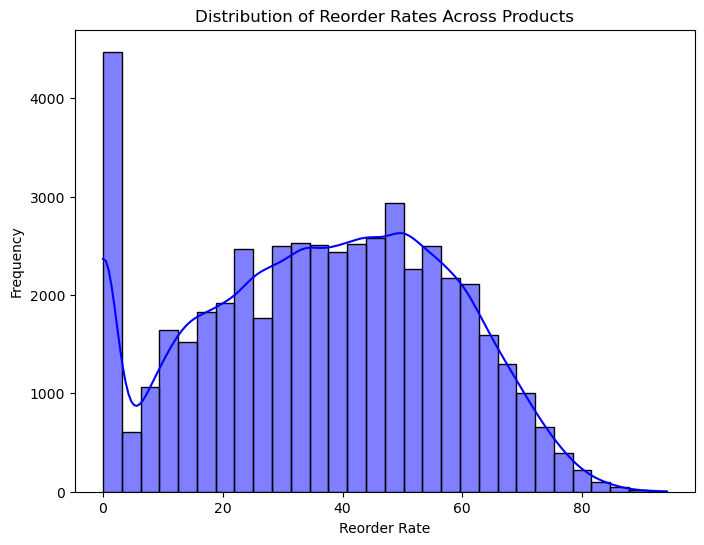

In [31]:
#Calculate Reorder Rates by Product
reorder_rates = df.groupby(['product_name']).agg(
    total_orders=('reordered', 'count'),
    reorders=('reordered', 'sum')
).reset_index()

reorder_rates['reorder_rate'] = reorder_rates['reorders'] / reorder_rates['total_orders']*100

most_reordered = reorder_rates.sort_values('reorder_rate', ascending=False).head(5)

plt.figure(figsize=(8, 6))
sns.histplot(data=reorder_rates, x='reorder_rate', bins=30, kde=True, color='blue')
plt.title('Distribution of Reorder Rates Across Products')
plt.xlabel('Reorder Rate')
plt.ylabel('Frequency')

#saving to PNG file
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/distribution_of_reorder.png')
plt.show()


In [33]:
products_df = pd.read_csv(r'/Users/user/Documents/InstaCart Basket Analysis/02 Data/Prepared Data/products_clean.csv')

In [35]:
# Assume 'reordered' is a column in your DataFrame where 1 indicates a reorder and 0 indicates a first-time order
product_reorders = df.groupby('product_id').agg(
    total_orders=pd.NamedAgg(column='order_id', aggfunc='count'),
    reorders=pd.NamedAgg(column='reordered', aggfunc='sum')
).reset_index()

product_reorders['reorder_rate'] = product_reorders['reorders'] / product_reorders['total_orders']

top_reordered_products = product_reorders.sort_values('reorder_rate', ascending=False).head(20)

top_reordered_products = product_reorders.sort_values('reorder_rate', ascending=False).head(20)

# Assume you have a DataFrame named products_df with columns 'product_id' and 'product_name'
top_reordered_products = top_reordered_products.merge(products_df, on='product_id', how='left')

print(top_reordered_products[['product_name', 'reorder_rate']])

                                product_name  reorder_rate
0                        Raw Veggie Wrappers      0.941176
1   Serenity Ultimate Extrema Overnight Pads      0.931034
2                        Orange Energy Shots      0.923077
3                         Chocolate Love Bar      0.920792
4                  Soy Powder Infant Formula      0.914286
5           Simply Sleep Nighttime Sleep Aid      0.911111
6                  Energy Shot, Grape Flavor      0.909091
7                             Sparking Water      0.900000
8    Russian River Valley Reserve Pinot Noir      0.900000
9                            Maca Buttercups      0.900000
10                        Bars Peanut Butter      0.895522
11                 Soy Crisps Lightly Salted      0.893939
12     Jet Fuel Dark Roast Whole Bean Coffee      0.892857
13                        High Gravity Lager      0.891892
14                     Benchbreak Chardonnay      0.891892
15                       Almond Orgeat Syrup      0.8888

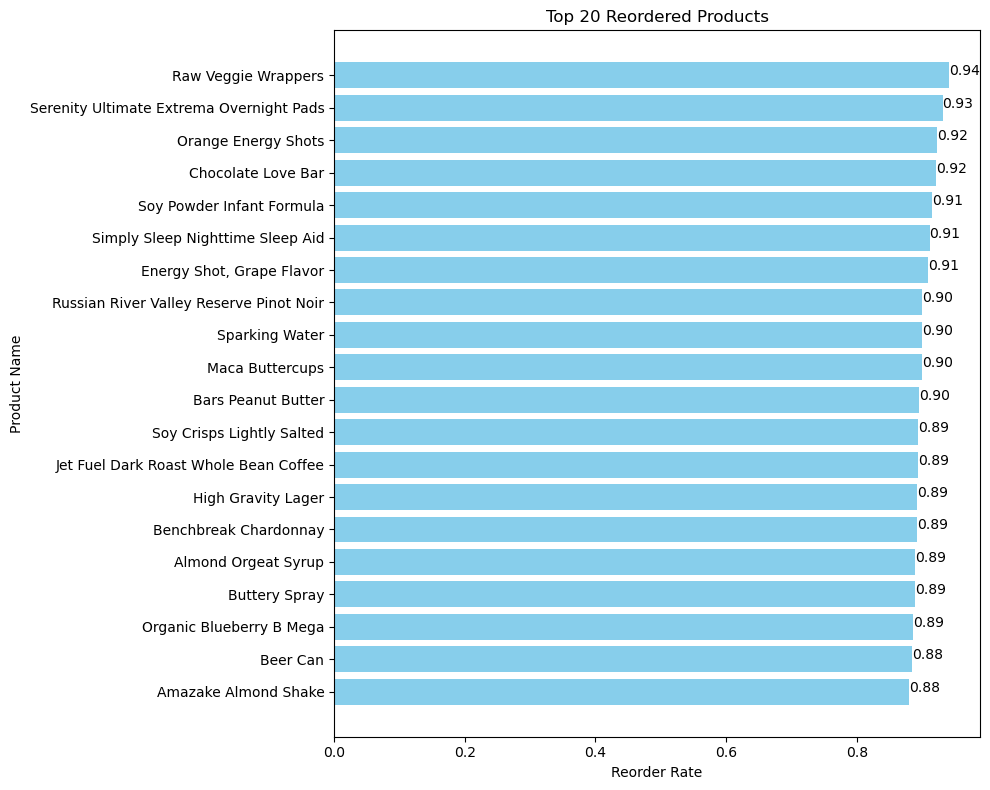

In [38]:
#Plotting a chart 
import matplotlib.pyplot as plt

# Sort the top_reordered_products DataFrame by reorder_rate for better visualization
top_reordered_products = top_reordered_products.sort_values('reorder_rate', ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_reordered_products['product_name'], top_reordered_products['reorder_rate'], color='skyblue')
plt.xlabel('Reorder Rate')
plt.ylabel('Product Name')
plt.title('Top 20 Reordered Products')

# Add reorder rate labels to each bar
for index, value in enumerate(top_reordered_products['reorder_rate']):
    plt.text(value, index, f'{value:.2f}')

plt.tight_layout()
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/top_20_products_reorder.png')
plt.show()

/var/folders/05/5w9r7lqn6bv_rzky3683m2_80000gp/T/ipykernel_1559/1061610891.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_price_by_segment, x='income_segment', y='mean_price', palette='viridis')


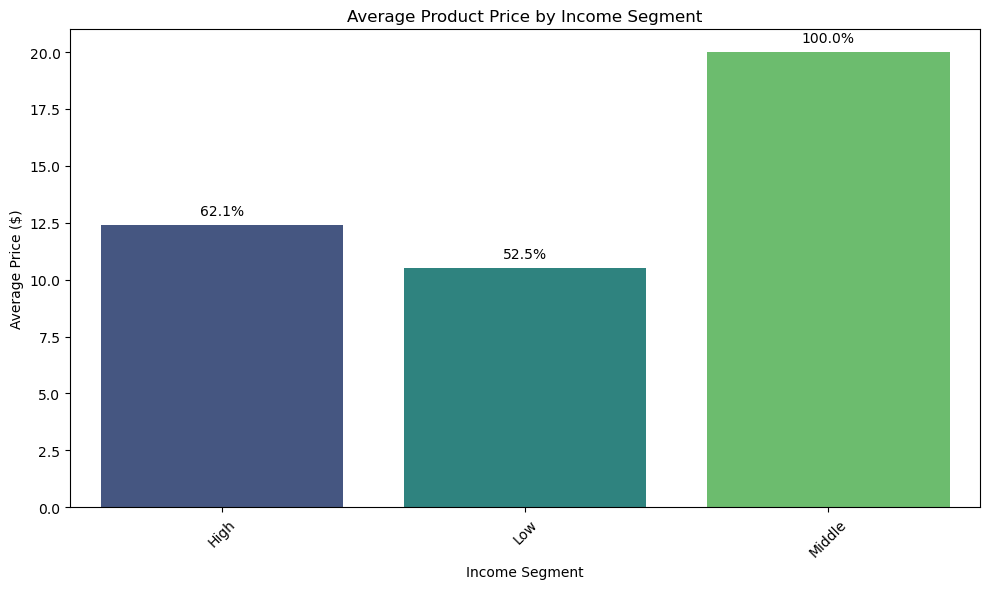

In [49]:
#Sample data
data = {
    'product_id': [1, 2, 3, 4, 5],
    'order_id': [101, 102, 103, 104, 105],
    'price': [10.5, 20.0, 15.75, 8.99, 12.50],
    'income': [40000, 60000, 80000, 100000, 120000]
}

df = pd.DataFrame(data)

# Define income segments
def income_segment(income):
    if income < 50000:
        return 'Low'
    elif income < 75000:
        return 'Middle'
    else:
        return 'High'

# Apply function to create 'income_segment' column
df['income_segment'] = df['income'].apply(income_segment)

# Calculate the average price for each product (assuming 'price' is the column for product price)
df['mean_price'] = df.groupby('product_id')['price'].transform('mean')

# Group by income_segment and calculate the average of mean_price
avg_price_by_segment = df.groupby('income_segment', observed=True)['mean_price'].mean().reset_index()

# Plotting chart 
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=avg_price_by_segment, x='income_segment', y='mean_price', palette='viridis')
plt.title('Average Product Price by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Add value labels in percentage format
for p in barplot.patches:
    barplot.annotate(f'{100 * p.get_height() / df["mean_price"].max():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.tight_layout()
plt.savefig('/Users/user/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/aveg_price_income.png')
plt.show()
plt.show()
